In [11]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [12]:
df = pd.read_csv('./data/sample_moral_appeal.csv').rename(columns = {'moral': 'moral_appeal'})
df

,ad,moral_appeal
0,yearold danylo is not only battling cancer but...,1
1,learn how to use the new staffing law to impro...,0
2,we are live with climate activist anuna de wev...,0
3,did you miss the t summit relive the daylong e...,0
4,friday is north carolinas online voter registr...,0
...,...,...
195,you can make a difference this year donate now...,1
196,dear readers\nrussian nazis do not stop exterm...,1
197,education risks becoming the greatest divider ...,1
198,shelling killed her mother\nwithout an urgent ...,1


In [13]:
# creating prediction model

# creating the filters 
filters =  ['rights', 'equal', 'justice', 'protect', 'equality',  'social' , 'environment',  'popular', 'prohibition' ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.590
                 precision    recall  f1-score   support

no-moral_appeal       0.56      0.92      0.69       101
   moral_appeal       0.76      0.25      0.38        99

       accuracy                           0.59       200
      macro avg       0.66      0.59      0.54       200
   weighted avg       0.66      0.59      0.54       200

confusion matrix:
[[93  8]
 [74 25]]



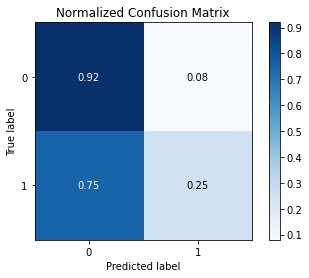

In [14]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['moral_appeal'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['moral_appeal'], y_pred, target_names=['no-moral_appeal', 'moral_appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['moral_appeal'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['moral_appeal'], y_pred, normalize=True)
plt.show()